In [107]:
# For data manipulation and analysis
import pandas as pd  

# For statistical data visualization
import seaborn as sns 

# For creating plots and visualizations
import matplotlib.pyplot as plt  

# For numerical computing and array manipulation
import numpy as np  

# Importing specific functions from scipy.stats module
# For statistical functions such as correlation calculation and normality test
from scipy.stats import spearmanr, shapiro, pearsonr  


In [108]:
# Setting the style for our plots
sns.set_style("whitegrid")
colors = ["#dabfff", "#907ad6", "#4f518c"] 

Violin Plot

In [109]:
def violinPlot(x,y,data):
    
    sns.violinplot(x=x, y=y, data=data,palette=colors)
    plt.xlabel('News Sentiments', fontsize=12)
    plt.ylabel('Change percentages of the stock price (%)', fontsize=12)
    plt.title('Impact of News Sentiments on Stock Price Changes', fontsize=14)

    #plt.show()

Bar Plots

In [110]:
def frequencySentiments(x,data):
    sentiment_counts = data[x].value_counts()
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,palette=colors,edgecolor='black')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title('Sentiment Frequency')
    #plt.show()

In [111]:
def frequencyLabels(x,data):
    labels_count= data[x].value_counts()
    sns.barplot(x=labels_count.index, y=labels_count.values,palette=colors,edgecolor='black')
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.title('Label Frequency')
    #plt.show()

Scatter Plot

In [112]:
def scatterPlot(x,y,data):
    sns.regplot(x=x, y=y, data=data, scatter=True, color='#dabfff', line_kws={'color':'#4f518c'}, ci=None)
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Change in Stock Price (%)')
    plt.title('Sentiment Scores vs. Stock Price Changes')
    #plt.show()

Tests

In [113]:
def spearman_test(dataframe, var1, var2):
    """Perform Spearman Rank Correlation Test between two variables in a dataframe."""
    spearman_corr, spearman_p_value = spearmanr(dataframe[var1], dataframe[var2])
    return spearman_corr, spearman_p_value

def shapiro_test(data):
    """Perform Shapiro-Wilk Test for normality."""
    shapiro_stat, shapiro_p_value = shapiro(data)
    return shapiro_stat, shapiro_p_value

def pearson_test(dataframe, var1, var2):
    """Perform Pearson Correlation Test between two variables in a dataframe."""
    clean_data = dataframe[[var1, var2]].dropna()
    
    pearson_corr, pearson_p_value = pearsonr(clean_data[var1], clean_data[var2])
    return pearson_corr, pearson_p_value

In [114]:
df=pd.read_csv(r'..\data\NewsWithStockPrices.csv')

# <font color='pink'>After 30 mins</font>

In [115]:
after_30=pd.read_csv(r'..\data\stockPrices\stock_prices_after_30_mins.csv')
after_30.head(1)

,Date,article_title,article,source_name,source_link,ticker_symbol,Positive,Negative,Neutral,Compound,Sentiment,stock_price,stock_price_after_30_mins,change_percentage,label
0,2024-05-06 19:20:00,25 Richest Billionaires in Manufacturing Industry,"In this article, we discuss the 25 richest bil...",Yahoo Finance,https://finance.yahoo.com/news/25-richest-bill...,AAPL,0.12,0.004,0.876,0.9996,Positive,181.100006,181.399994,0.165648,1


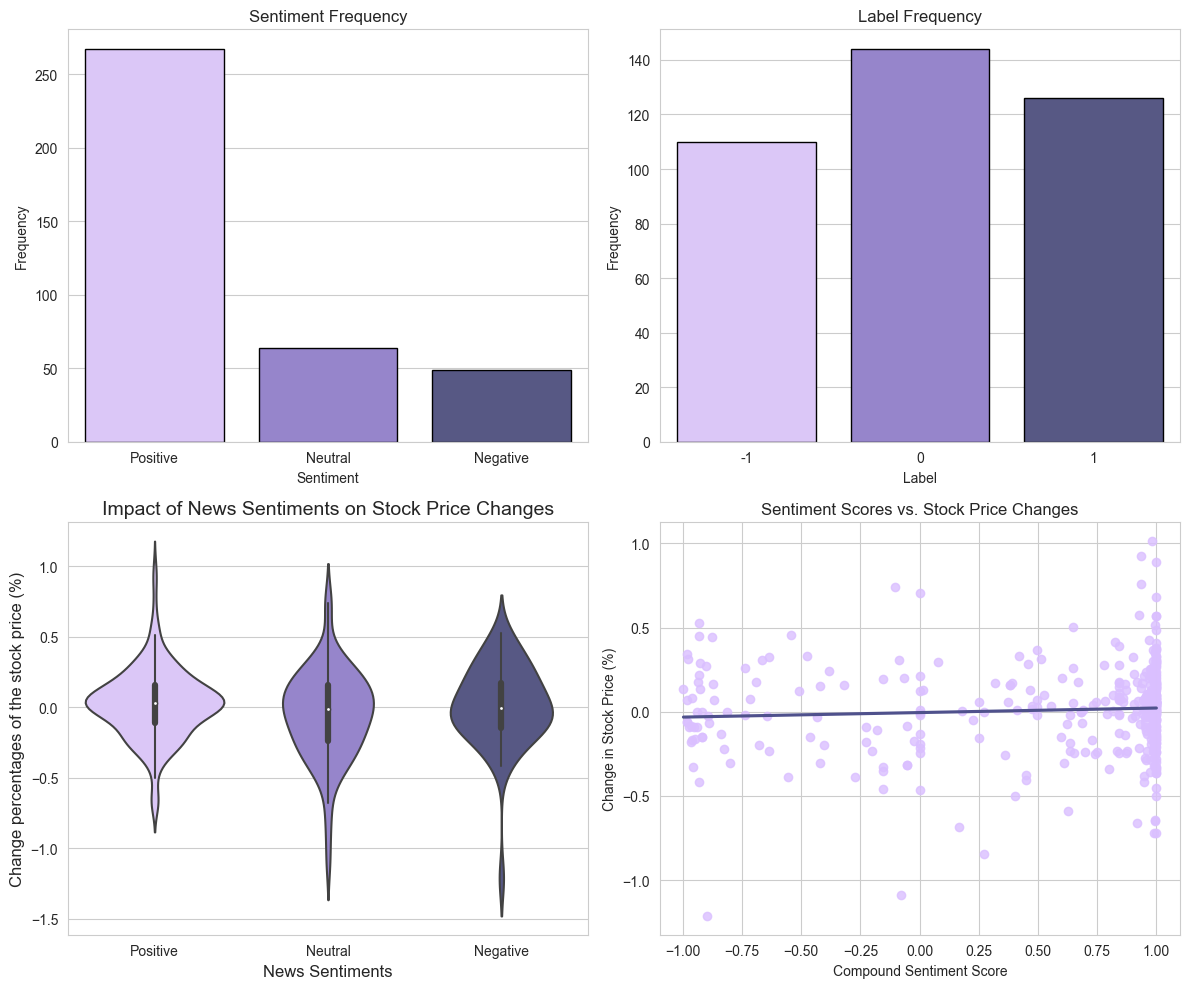

In [116]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

plt.sca(axs[0, 0])
frequencySentiments('Sentiment', after_30)

plt.sca(axs[0, 1])
frequencyLabels('label', after_30)

plt.sca(axs[1, 0])
violinPlot('Sentiment', 'change_percentage', after_30)

plt.sca(axs[1, 1])
scatterPlot('Compound', 'change_percentage', after_30)

plt.tight_layout()

plt.show()


In [117]:
compound_scores = after_30['Compound']
change_percentage = after_30['change_percentage']


spearman_corr, spearman_p_value = spearman_test(after_30, 'Compound', 'change_percentage')
shapiro_stat_compound, shapiro_p_value_compound = shapiro_test(compound_scores)
shapiro_stat_change, shapiro_p_value_change = shapiro_test(change_percentage)
pearson_corr, pearson_p_value = pearson_test(after_30, 'Compound', 'change_percentage')


print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)
print("Shapiro-Wilk test statistic for Compound scores:", shapiro_stat_compound)
print("p-value for Compound scores:", shapiro_p_value_compound)
print("Shapiro-Wilk test statistic for Change percentage:", shapiro_stat_change)
print("p-value for Change percentage:", shapiro_p_value_change)
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

Spearman correlation coefficient: 0.0791532886744835
p-value: 0.12348336392421976
Shapiro-Wilk test statistic for Compound scores: 0.6982914805412292
p-value for Compound scores: 1.4946668365548623e-25
Shapiro-Wilk test statistic for Change percentage: 0.9664555788040161
p-value for Change percentage: 1.1835822988359723e-07
Pearson correlation coefficient: 0.065237540561139
p-value: 0.20448521890162483


# <font color='pink'>After 6 hours</font>

In [118]:
after_6_hours=pd.read_csv('..\data\stockPrices\stock_prices_after_6_hours.csv')

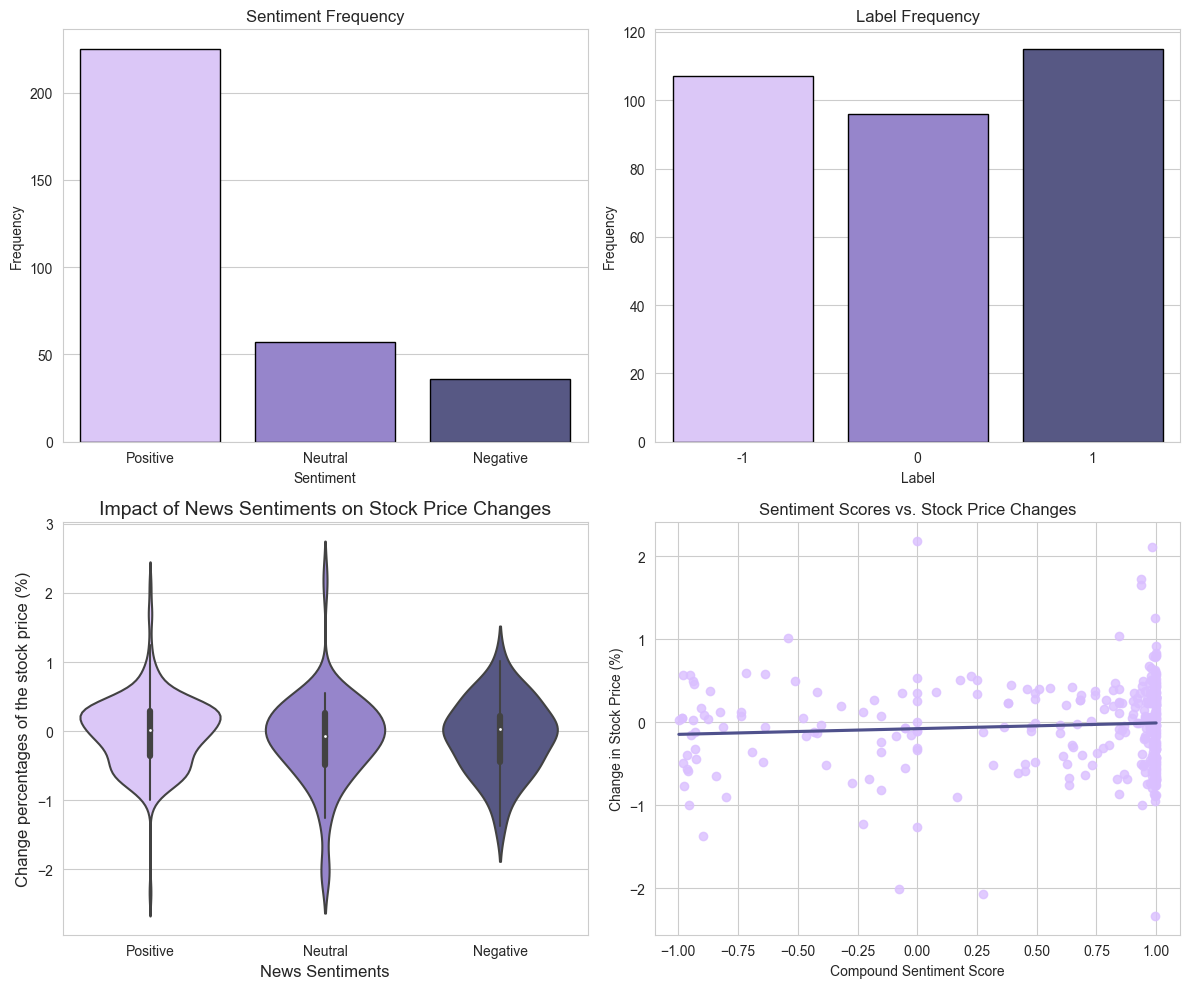

In [119]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10)) 

plt.sca(axs[0, 0])
frequencySentiments('Sentiment', after_6_hours)

plt.sca(axs[0, 1])
frequencyLabels('label', after_6_hours)

plt.sca(axs[1, 0])
violinPlot('Sentiment', 'change_percentage', after_6_hours)

plt.sca(axs[1, 1])
scatterPlot('Compound', 'change_percentage', after_6_hours)

plt.tight_layout()

plt.show()


In [120]:
compound_scores = after_6_hours['Compound']
change_percentage = after_6_hours['change_percentage']


spearman_corr, spearman_p_value = spearman_test(after_6_hours, 'Compound', 'change_percentage')
shapiro_stat_compound, shapiro_p_value_compound = shapiro_test(compound_scores)
shapiro_stat_change, shapiro_p_value_change = shapiro_test(change_percentage)
pearson_corr, pearson_p_value = pearson_test(after_6_hours, 'Compound', 'change_percentage')


print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)
print("Shapiro-Wilk test statistic for Compound scores:", shapiro_stat_compound)
print("p-value for Compound scores:", shapiro_p_value_compound)
print("Shapiro-Wilk test statistic for Change percentage:", shapiro_stat_change)
print("p-value for Change percentage:", shapiro_p_value_change)
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

Spearman correlation coefficient: 0.05084149147428366
p-value: 0.3661821141736106
Shapiro-Wilk test statistic for Compound scores: 0.6997678279876709
p-value for Compound scores: 1.882910164338868e-23
Shapiro-Wilk test statistic for Change percentage: 0.9519089460372925
p-value for Change percentage: 1.0784068749103426e-08
Pearson correlation coefficient: 0.08126885266360852
p-value: 0.14820050312047534


# <font color ='pink'> After a Day</font>

In [121]:
after_1_day=pd.read_csv('..\data\stockPrices\stock_prices_after_1_day.csv')

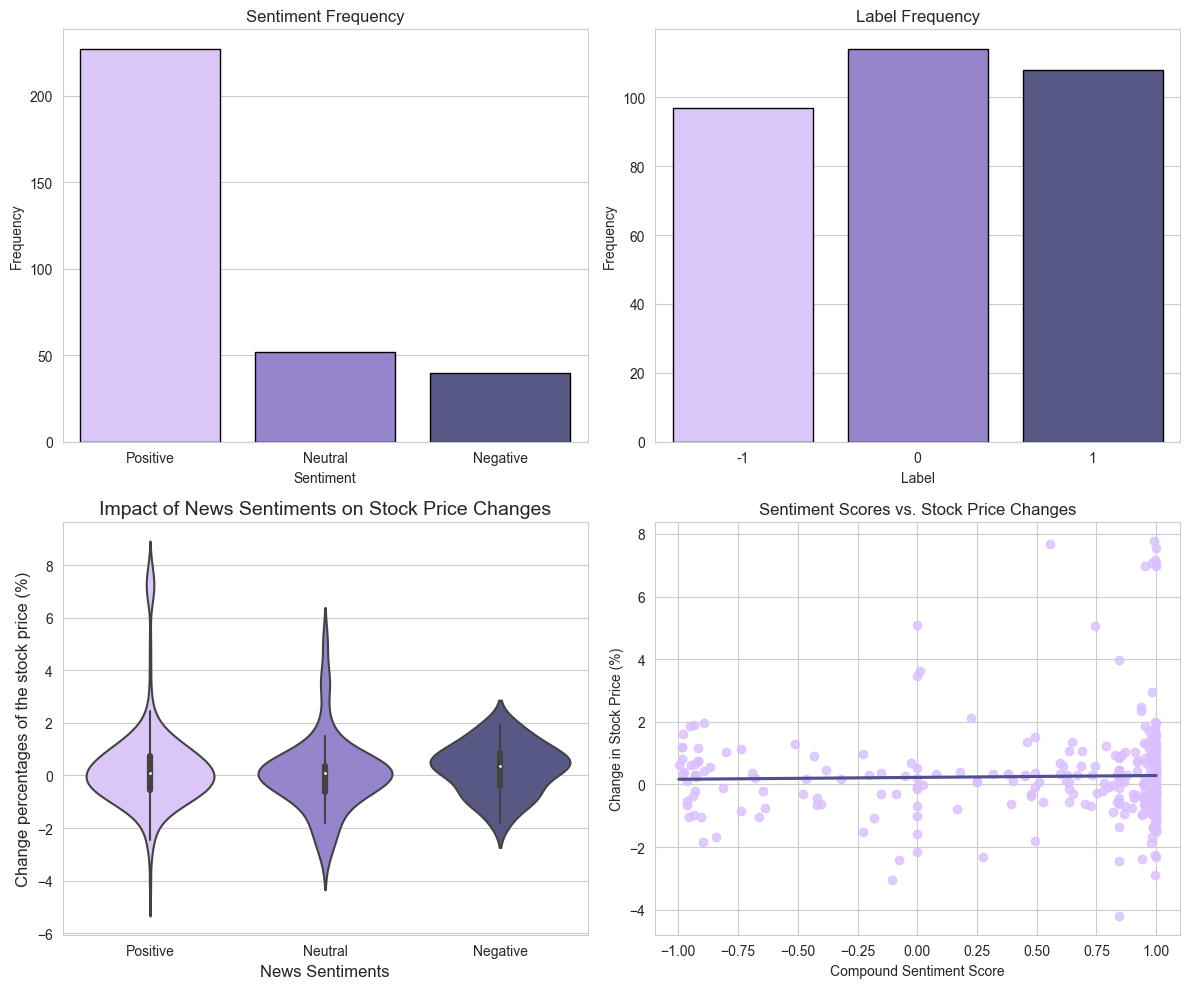

In [122]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

plt.sca(axs[0, 0])
frequencySentiments('Sentiment', after_1_day)

plt.sca(axs[0, 1])
frequencyLabels('label', after_1_day)

plt.sca(axs[1, 0])
violinPlot('Sentiment', 'change_percentage', after_1_day)

plt.sca(axs[1, 1])
scatterPlot('Compound', 'change_percentage', after_1_day)

plt.tight_layout()

plt.show()


In [123]:
compound_scores = after_1_day['Compound']
change_percentage = after_1_day['change_percentage']


spearman_corr, spearman_p_value = spearman_test(after_1_day, 'Compound', 'change_percentage')
shapiro_stat_compound, shapiro_p_value_compound = shapiro_test(compound_scores)
shapiro_stat_change, shapiro_p_value_change = shapiro_test(change_percentage)
pearson_corr, pearson_p_value = pearson_test(after_1_day, 'Compound', 'change_percentage')


print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)
print("Shapiro-Wilk test statistic for Compound scores:", shapiro_stat_compound)
print("p-value for Compound scores:", shapiro_p_value_compound)
print("Shapiro-Wilk test statistic for Change percentage:", shapiro_stat_change)
print("p-value for Change percentage:", shapiro_p_value_change)
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

Spearman correlation coefficient: -0.05012573383281251
p-value: 0.37222099298858236
Shapiro-Wilk test statistic for Compound scores: 0.6937079429626465
p-value for Compound scores: 1.0831299253538774e-23
Shapiro-Wilk test statistic for Change percentage: 0.7931293845176697
p-value for Change percentage: 7.748489018528897e-20
Pearson correlation coefficient: 0.024884980940517328
p-value: 0.6579221308221296
